<a href="https://colab.research.google.com/github/haripatel07/Smart_Agriculture_System/blob/main/Irrigation_schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv
dataframe = pd.read_csv("Irrigation Scheduling.csv")

In [4]:
#Displaying top 5 rows
dataframe.head()

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24


In [5]:
#Displaying bottom 5 rows
dataframe.tail()

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
4683,4684,29.34,9921.75,-17.49,327,1,0,Dry,08-10-2022,22:06:24
4684,4685,29.31,9921.45,-17.52,328,1,0,Dry,08-10-2022,22:06:24
4685,4686,29.29,9921.48,-17.51,328,1,0,Dry,08-10-2022,22:06:24
4686,4687,29.26,9921.51,-17.51,327,1,0,Dry,08-10-2022,22:06:24
4687,4688,29.28,9922.20,-17.45,323,1,0,Dry,08-10-2022,22:06:24


In [6]:
#Columns
dataframe.columns

Index(['id', 'temperature', 'pressure', 'altitude', 'soilmiosture', 'note',
       'status', 'class', 'date', 'time'],
      dtype='object')

In [7]:
#Displaying class
dataframe['class']

,class
0,Very Dry
1,Very Dry
2,Very Dry
3,Very Dry
4,Very Dry
...,...
4683,Dry
4684,Dry
4685,Dry
4686,Dry


In [8]:
#Checking the dimensions of the dataframe
dataframe.shape

(4688, 10)

In [9]:
#Describing data
dataframe.describe()

,id,temperature,pressure,altitude,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4682.000000,4688.000000,4688.000000,4688.000000
mean,2344.500000,29.599089,9963.153215,-14.291506,243.692406,1.878413,0.703712
std,1353.453361,5.842685,1383.602527,2.649815,76.176855,1.152977,0.456668
min,1.000000,27.970000,-2120.400000,-17.610000,-243.000000,0.000000,0.000000
25%,1172.750000,28.630000,9935.255000,-16.340000,171.000000,1.000000,0.000000
50%,2344.500000,29.180000,9969.535000,-13.470000,233.000000,2.000000,1.000000
75%,3516.250000,29.990000,9975.700000,-12.950000,326.000000,3.000000,1.000000
max,4688.000000,178.700000,99931.100000,116.700000,480.000000,3.000000,1.000000


In [10]:
#Info of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4688 non-null   int64  
 1   temperature   4688 non-null   float64
 2   pressure      4688 non-null   float64
 3   altitude      4682 non-null   float64
 4   soilmiosture  4688 non-null   int64  
 5   note          4688 non-null   int64  
 6   status        4688 non-null   int64  
 7   class         4688 non-null   object 
 8   date          4688 non-null   object 
 9   time          4688 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 366.4+ KB


In [11]:
#Checking for unique values
dataframe.nunique()

,0
id,4688
temperature,426
pressure,2593
altitude,555
soilmiosture,262
note,4
status,2
class,4
date,1
time,1


In [27]:
#Dropping unnecessary columns: Here id, date and time
modified_df = dataframe.drop(columns = {'id', 'date', 'time'})
modified_df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class
0,29.10,9984.53,-12.21,377,0,0,Very Dry
1,29.08,9984.36,-12.22,379,0,0,Very Dry
2,29.06,9984.56,-12.20,376,0,0,Very Dry
3,29.05,9984.39,-12.22,377,0,0,Very Dry
4,29.03,9984.42,-12.21,379,0,0,Very Dry


In [26]:
#Checking for null values
modified_df.isnull().sum()

,0
temperature,0
pressure,0
altitude,0
soilmiosture,0
note,0
status,0
class,0


In [25]:
#Filling the null values in 'altitude' column
modified_df['altitude'] = modified_df['altitude'].fillna(modified_df['altitude'].mean())
modified_df.isnull().sum()

,0
temperature,0
pressure,0
altitude,0
soilmiosture,0
note,0
status,0
class,0


In [15]:
#Checking count of each class
modified_df['class'].value_counts()

,count
class,
Very Wet,1842
Wet,1457
Very Dry,1023
Dry,366


<Axes: xlabel='class', ylabel='count'>

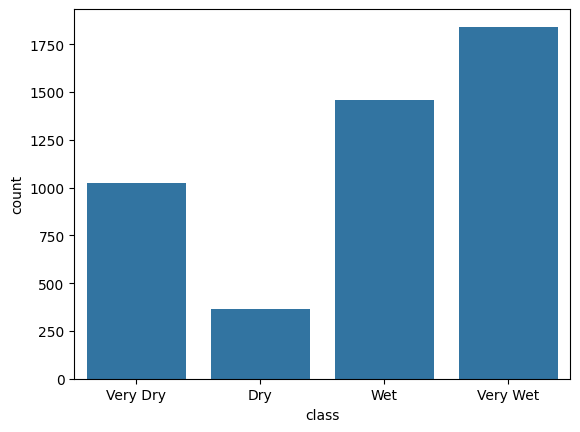

In [16]:
#Visualizing the class column
sns.countplot(x = 'class', data = modified_df)

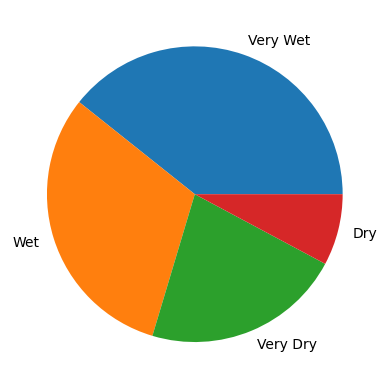

In [17]:
#Pie plot
plt.pie(modified_df['class'].value_counts(), labels = modified_df['class'].value_counts().index)
plt.show()

In [28]:
#Here we will use label encoding, since there is a natural ordinal order
from sklearn.preprocessing import OrdinalEncoder
# Define the correct order of moisture levels
custom_order = [["Very Dry", "Dry", "Wet", "Very Wet"]]

# Initialize OrdinalEncoder with the predefined order
oe = OrdinalEncoder(categories=custom_order)
modified_df['class'] = oe.fit_transform(modified_df[['class']])
modified_df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class
0,29.10,9984.53,-12.21,377,0,0,0.0
1,29.08,9984.36,-12.22,379,0,0,0.0
2,29.06,9984.56,-12.20,376,0,0,0.0
3,29.05,9984.39,-12.22,377,0,0,0.0
4,29.03,9984.42,-12.21,379,0,0,0.0


In [24]:
modified_df['class'].value_counts()

,count
class,
3.0,1842
2.0,1457
0.0,1023
1.0,366


# Checking for **correlations**

In [29]:
correlations = modified_df.corr()   #Leaving date and time
correlations

,temperature,pressure,altitude,soilmiosture,note,status,class
temperature,1.000000,0.069229,0.705929,-0.139279,0.034205,0.028588,0.034205
pressure,0.069229,1.000000,0.733949,-0.054813,-0.007703,0.003589,-0.007703
altitude,0.705929,0.733949,1.000000,-0.134819,0.076197,0.087741,0.076197
soilmiosture,-0.139279,-0.054813,-0.134819,1.000000,-0.969905,-0.894602,-0.969905
note,0.034205,-0.007703,0.076197,-0.969905,1.000000,0.908939,1.000000
status,0.028588,0.003589,0.087741,-0.894602,0.908939,1.000000,0.908939
class,0.034205,-0.007703,0.076197,-0.969905,1.000000,0.908939,1.000000


<Axes: >

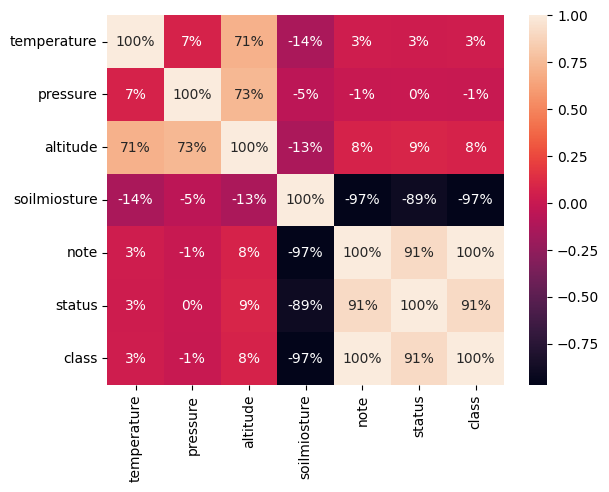

In [30]:
#Visualize the correlation of above data using heatmap
sns.heatmap(correlations, annot=True,fmt='.0%')